# Text Classification on BBC News Dataset

### Import Package

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
#nltk.download('punkt')
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

### Preview Dataset

In [2]:
dataset = pd.read_csv("bbc-news-data.csv",sep='\t')
dataset = dataset.drop(['filename','title'], axis = 1)
dataset['categoryId'] = dataset['category'].factorize()[0]
dataset.head()

,category,content,categoryId
0,business,Quarterly profits at US media giant TimeWarne...,0
1,business,The dollar has hit its highest level against ...,0
2,business,The owners of embattled Russian oil giant Yuk...,0
3,business,British Airways has blamed high fuel prices f...,0
4,business,Shares in UK drinks and food firm Allied Dome...,0


### Visualize Target Categories

In [3]:
Category = dataset[['category', 'categoryId']].drop_duplicates().sort_values('categoryId')
Category

,category,categoryId
0,business,0
510,entertainment,1
896,politics,2
1313,sport,3
1824,tech,4


<AxesSubplot:xlabel='category', ylabel='count'>

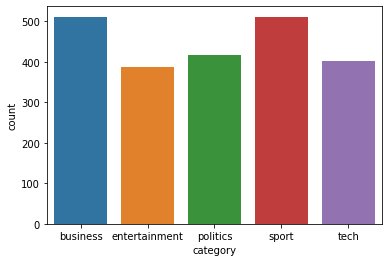

In [4]:
sns.countplot(dataset['category'])

## Q1. For each of the five categories: What are the most common topics among articles?

In [5]:
# defining separate datasets for each category

business = dataset[dataset['categoryId'] == 0]

business = business['content']

tech = dataset[dataset['categoryId'] == 1]

tech = tech['content']

politics = dataset[dataset['categoryId'] == 2]

politics = politics['content']

sport = dataset[dataset['categoryId'] == 3]

sport = sport['content']

entertainment = dataset[dataset['categoryId'] == 4]

entertainment = entertainment['content']

In [6]:
# defining the wordcloud
stop = set(stopwords.words('english'))

def wordcloud_draw(dataset, color = 'white'):
    words = ' '.join(dataset)
    cleaned_word = ' '.join([word for word in words.split()
                             
    if (word != 'news' and word != 'text')])

    wordcloud = WordCloud(stopwords = stop, background_color = color, width = 2500, height = 2500).generate(cleaned_word)

    plt.figure(1, figsize = (10,7))

    plt.imshow(wordcloud)

    plt.axis("off")

    plt.show()


## Business related topics:

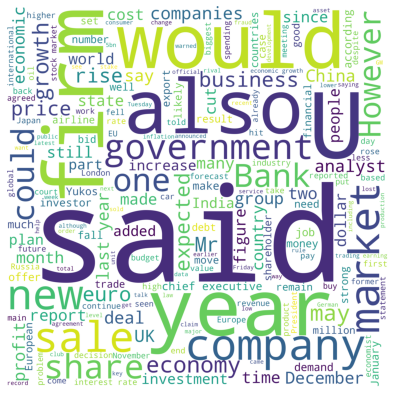

In [7]:
wordcloud_draw(business, 'white')

## Tech related topics:

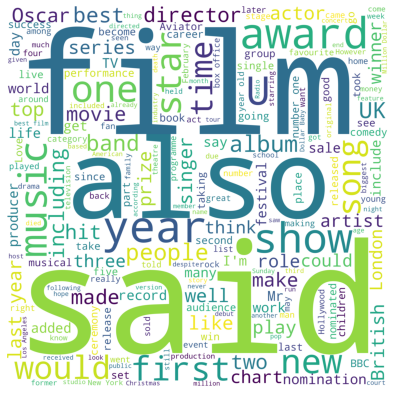

In [8]:
wordcloud_draw(tech, 'white')

## Politics related topics:

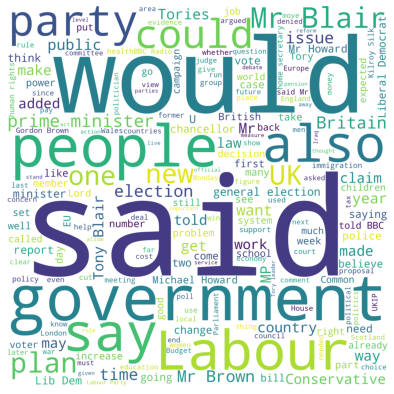

In [9]:
wordcloud_draw(politics, 'white')

## Sport related topics:

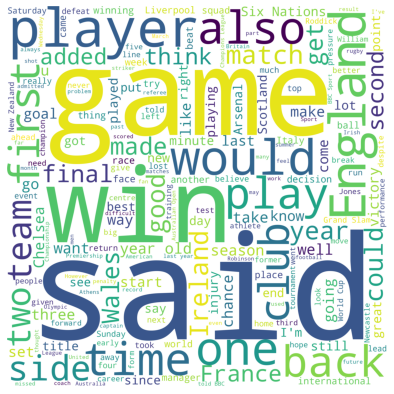

In [10]:
wordcloud_draw(sport, 'white')

## Enterntainment related topics:

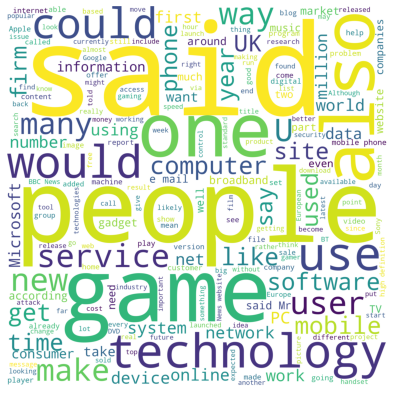

In [11]:
wordcloud_draw(entertainment, 'white')

## Q2 Across all categories: How many articles talk about each of the G20 countries?

In [12]:
print("List of G20 Countries and their references in articles\n")
ls = ['Argentina', 'Australia','Brazil', 'Canada', 'China', 'France', 'Germany','India', 'Indonesia', 'Italy', 'Japan', 'Korea', 'Mexico', 'Russia', 'Saudi', 'South Africa', 'Turkey', 'UK', 'US',"Europe"]
for i in range(len(ls)):
    print(ls[i],':',len(dataset[dataset['content'].str.contains(ls[i])]))

List of G20 Countries and their references in articles

Argentina : 24
Australia : 146
Brazil : 35
Canada : 34
China : 91
France : 189
Germany : 91
India : 92
Indonesia : 22
Italy : 83
Japan : 120
Korea : 43
Mexico : 17
Russia : 98
Saudi : 11
South Africa : 59
Turkey : 15
UK : 524
US : 655
Europe : 434


### Data Cleaning

In [13]:
# removing tags
def remove_tags(text):
  remove = re.compile(r'')
  return re.sub(remove, '', text)
dataset['content'] = dataset['content'].apply(remove_tags)

In [14]:
# removing special characters
def special_char(text):
  reviews = ''
  for x in text:
    if x.isalnum():
      reviews = reviews + x
    else:
      reviews = reviews + ' '
  return reviews
dataset['content'] = dataset['content'].apply(special_char)

In [15]:
# converting all text to lowercase
def convert_lower(text):
   return text.lower()
dataset['content'] = dataset['content'].apply(convert_lower)

In [16]:
# removing english stop words
def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text)
  return [x for x in words if x not in stop_words]
dataset['content'] = dataset['content'].apply(remove_stopwords)


In [17]:
# performing word lemmatization
def lemmatize_word(text):
  wordnet = WordNetLemmatizer()
  return " ".join([wordnet.lemmatize(word) for word in text])
dataset['content'] = dataset['content'].apply(lemmatize_word)

In [18]:
# cleaned dataset
dataset

,category,content,categoryId
0,business,quarterly profit u medium giant timewarner jum...,0
1,business,dollar hit highest level euro almost three mon...,0
2,business,owner embattled russian oil giant yukos ask bu...,0
3,business,british airway blamed high fuel price 40 drop ...,0
4,business,share uk drink food firm allied domecq risen s...,0
...,...,...,...
2220,tech,bt introducing two initiative help beat rogue ...,4
2221,tech,computer user across world continue ignore sec...,4
2222,tech,new european directive could put software writ...,4
2223,tech,man making sure u computer network safe secure...,4


# Training Classification model

In [19]:
# Classification using TFIDF vectorizer

# Vectorize training and testing data
def Vectorize(vec, X_train, X_test):    
    
    X_train_vec = vec.fit_transform(X_train)
    X_test_vec = vec.transform(X_test)
    
    print('Vectorization complete.\n')
    
    return X_train_vec, X_test_vec

In [20]:
# Train-test split and vectorize
X_train, X_test, y_train, y_test = train_test_split(dataset['content'], dataset['categoryId'], test_size=0.2, shuffle=True)
X_train_vec, X_test_vec = Vectorize(TfidfVectorizer(), X_train, X_test)

model = LogisticRegression(fit_intercept= False, penalty = 'l2')
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)
        
# Print scores for the classifier
print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t\tF1: %1.3f\n" % (accuracy_score(y_test, y_pred) * 100,precision_score(y_test, y_pred, average='macro'), recall_score(y_test, y_pred, average='macro'), f1_score(y_test, y_pred, average='macro')))
    

Vectorization complete.

Accuracy: 97.753 	Precision: 0.977 	Recall: 0.978 		F1: 0.977



Made by [Saharsh Laud](https://github.com/SaharshLaud)